Capstone Project
---
DSI 11 - Dina Bahar

### 1. Identify chosen proposal

What recipe should you try next?

### 2. Problem Statement

Since the lockdown order, everyone has been cooking at home more. While it might be out of necessity for some and a blessing for others, everyone could benefit from a recipe recommender to cut down the search time for their next dinner. In this project, my goal is to build a system that **recommends users new recipes that are similar to what they've rated highly**.

### 3. Outline

1. Data collection: using [Food.com Recipes and Interactions](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions) kaggle dataset
2. Feature engineering: recipe's level of difficulty
3. NLP on text variables: user reviews, recipe ingredients, and recipe steps
4. Calculate cosine similarity on users & recipes **(NEEDS MORE PLANNING)**
5. Deliverables:
    - MVP: a content-based recommender system (format = data frame)
    - Stretch goals 1: a user-based recommender system
    - Stretch goals 2: a flask app that spits out the next recipe a user should try based on their (varying) preferences

### 4. Risks & assumptions of your data

- Size of data from kaggle is already 862.4 MB on its own. 
- As the project progresses, the storage requirements will grow as well. This might slow down my process if I'm just using my good ol' macbook.

### 5. Goals & success criteria

- Recommender system metrics???

### 6. Documents your data source

Dataset: [Food.com Recipes and Interactions](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions)
1. RAW_recipes.csv
2. RAW_interactions.csv
3. *PP_recipes.csv* (after preliminary EDA, I have concluded that this dataset is not useful)
4. PP_users.csv

Owners: Shuyang Li, Bodhisattwa Prasad Majumder

##### NOTE: Datasets are not included in this repo since it's more than 100MB. Please refer to the kaggle page for the data.

### 7. Performs & summarizes preliminary EDA of your data

See below for preliminary EDA on all 4 datasets.

### 8. Can I solve my problem statement with the dataset I have?

YES

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

I. EDA on `RAW_recipes.csv`
---

Data dictionary

| Column        | Description                        |
| ------------- | ---------------------------------- |
|name           | Recipe name                        |
|id             | Recipe ID                          |
|minutes        | Minutes to prepare recipe          |
|contributor_id | User ID who submitted this recipe  |
|submitted      | Date recipe was submitted          |
|tags           | Food.com tags for recipe           |
|nutrition      | Nutrition information*             |
|n_steps        | Number of steps in recipe          |
|steps          | Text for recipe steps, in order    |
|description    | User-provided description          |
|ingredients    | List of ingredient names           |
|n_ingredients  | Number of ingredients              |

*Nutrition information: calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV)

^ Is this a LIST? Or a VECTOR?

In [7]:
raw_recipes = pd.read_csv('../data/RAW_recipes.csv')
raw_recipes.shape

(231637, 12)

In [3]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


#### `raw_recipes` summary statistics


In [4]:
round(raw_recipes.drop(columns = ['id', 'contributor_id']).describe())

,minutes,n_steps,n_ingredients
count,2.316370e+05,231637.0,231637.0
mean,9.399000e+03,10.0,9.0
std,4.461963e+06,6.0,4.0
min,0.000000e+00,0.0,1.0
25%,2.000000e+01,6.0,6.0
50%,4.000000e+01,9.0,9.0
75%,6.500000e+01,12.0,11.0
max,2.147484e+09,145.0,43.0


##### NOTE: 
- Need to check if converting `minutes` to hours help readability.
- Recipe with 0 n_steps seems like an outlier.

#### Investigate recipe with 0 steps

In [11]:
no_steps = raw_recipes[raw_recipes['n_steps'] == 0]
no_steps

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
3381,all season bread,176767,90,331268,2006-07-10,"['time-to-make', 'course', 'main-ingredient', ...","[198.8, 11.0, 70.0, 18.0, 5.0, 5.0, 10.0]",0,[],just change the fruit/vegetable in this recipe...,"['flour', 'baking soda', 'salt', 'baking powde...",12


In [16]:
print('RECIPE DESCRIPTION:')
print()
print(no_steps['description'][3381])
print()
print()
print('LIST OF INGREDIENTS:')
print()
print(no_steps['ingredients'][3381])

RECIPE DESCRIPTION:

just change the fruit/vegetable in this recipe and make the (tender, moist, heavy dark) bread your heart desires!  try zucchini in the summer, pumpkin in the fall,  carrot-raisin in the winter, & banana-walnut in the spring. 

use your imagination.


LIST OF INGREDIENTS:

['flour', 'baking soda', 'salt', 'baking powder', 'cinnamon', 'eggs', 'white sugar', 'vegetable oil', 'real vanilla', 'raw carrots', 'raisins', 'walnuts']


##### NOTE: Don't know yet which other bread recipe this is referring to. Needs more investigation.

#### Correlation between numerical variables

As expected, the number of steps and ingredients of a recipe is positively correlated. This implies simplicity/difficulty of the recipe, which can be a good feature to include in my model.

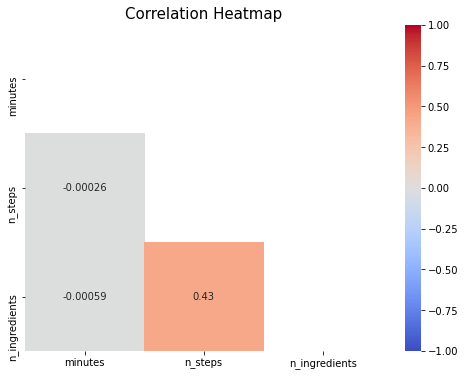

In [65]:
plt.figure(figsize=(8,6))

sns.heatmap(raw_recipes.drop(columns = ['id', 'contributor_id']).corr(), mask=np.triu(raw_recipes.drop(columns = ['id', 'contributor_id']).corr()), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap',  fontsize = 15);

#### Explore recipe length of prep & cook time

Convert minutes to hours for easier readibility.

Lots of outliers.

Needs more investigating to see if recipes are really calling for longer than 10 hours of prepping & cooking. Will probably exclude this from my data if showing to make no sense.

In [70]:
raw_recipes['hours'] = raw_recipes.minutes.apply(lambda x: x/60)

In [76]:
round(raw_recipes['hours'].describe(),2)

count      231637.00
mean          156.64
std         74366.05
min             0.00
25%             0.33
50%             0.67
75%             1.08
max      35791394.12
Name: hours, dtype: float64

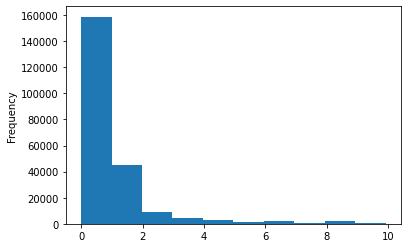

In [88]:
raw_recipes[raw_recipes['hours'] < 10]['hours'].plot(kind='hist');

##### NOTE: Lots of outliers.

In [89]:
raw_recipes[raw_recipes['hours'] > 10]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,hours
11,better than sex strawberries,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...","[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",8,['crush vanilla wafers into fine crumbs and li...,simple but sexy. this was in my local newspape...,"['vanilla wafers', 'butter', 'powdered sugar',...",7,24.333333
12,better then bush s baked beans,67547,2970,85627,2003-07-26,"['weeknight', 'time-to-make', 'course', 'main-...","[462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]",9,['in a very large sauce pan cover the beans an...,i'd have to say that this is a labor of love d...,"['great northern bean', 'chicken bouillon cube...",13,49.500000
50,keep it going german friendship cake,26995,14450,37305,2002-04-30,"['weeknight', 'time-to-make', 'course', 'main-...","[724.4, 38.0, 297.0, 20.0, 18.0, 31.0, 39.0]",13,['mix starter ingredients in a bowl and let st...,"yes, this sounds bizarre, but it really is tas...","['flour', 'water', 'dry yeast', 'milk', 'sugar...",17,240.833333
58,marijuana vinegar,24478,20160,32692,2002-04-08,"['weeknight', 'time-to-make', 'course', 'cuisi...","[3.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",5,['mix the herbs and vinegar together in a jar'...,stefan and emily used to make this stuff when ...,"['fresh herbs', 'cider vinegar', 'fresh herb']",3,336.000000
81,red macaroni salad,64302,1470,82367,2003-06-11,"['weeknight', 'time-to-make', 'course', 'main-...","[572.6, 43.0, 113.0, 11.0, 17.0, 18.0, 24.0]",7,"['in large mixing bowl , combine your macaroni...",this is not your usual macaroni salad....there...,"['elbow macaroni', 'green pepper', 'onion', 'c...",10,24.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230590,zesty slow cooker italian pot roast,151605,610,53959,2006-01-13,"['time-to-make', 'course', 'main-ingredient', ...","[912.8, 85.0, 19.0, 9.0, 113.0, 112.0, 14.0]",9,"['place potatoes , carrots , and celery in bot...",found in a slow cooker cookbook. update: you c...,"['potatoes', 'baby carrots', 'celery', 'bonele...",7,10.166667
230741,zippy london broil marinade,505112,1445,1139722,2013-08-01,"['time-to-make', 'course', 'preparation', 'low...","[367.5, 56.0, 15.0, 19.0, 3.0, 25.0, 3.0]",6,['mis all ingredients together in a zip lock b...,i came up with this marinade by combining two ...,"['garlic', 'balsamic vinegar', 'lemon juice', ...",11,24.083333
230913,zucchini and cheese damper,283151,1505,422893,2008-01-31,"['time-to-make', 'course', 'main-ingredient', ...","[332.7, 13.0, 2.0, 48.0, 25.0, 25.0, 16.0]",7,"['sift flour , salt & pepper together', 'light...",it's that time of year again when zucchinis ar...,"['self-raising flour', 'salt', 'black pepper',...",8,25.083333
231355,zucchini salsa canned,462992,2900,1403860,2011-08-24,"['time-to-make', 'course', 'main-ingredient', ...","[64.5, 0.0, 44.0, 53.0, 3.0, 0.0, 4.0]",27,['day one: in a large bowl or stainless pan co...,this is a delicious salsa recipe that my siste...,"['zucchini', 'sweet white onions', 'green bell...",17,48.333333


---

EDA on`RAW_interactions`
---

Data dictionary

| Column   | Description        |
| -------- | ------------------ |
|user_id   | User ID            |
|recipe_id | Recipe ID          |
|date      | Date of interaction|
|rating    | Rating given       |
|review    | Review text        |

In [9]:
raw_interactions = pd.read_csv('../data/RAW_interactions.csv')
raw_interactions.shape

(1132367, 5)

In [10]:
raw_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


#### Explore relationship between recipe and user dataset (validity check)

Joined on `raw_interactions.recipe_id = raw_recipes.id`

In [11]:
raw_interactions[raw_interactions['recipe_id'] == 137739]

,user_id,recipe_id,date,rating,review
927061,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
927062,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
927063,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...


#### Distribution of ratings


Users generally rate higher. Not surprising, might be because they'd only try the recipe because they **are** interested in the recipe to begin with.

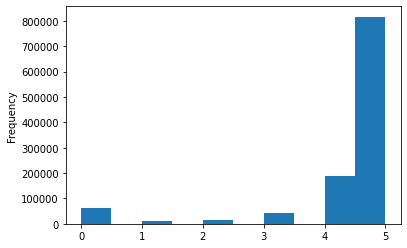

In [14]:
raw_interactions.rating.plot(kind='hist');

#### Distribution of number of reviews per recipe

On average, a recipe receives approx. 5 reviews each on food.com. See summary statistics and plot below.

In [28]:
raw_interactions.groupby('recipe_id')['user_id'].count().describe()

count    231637.000000
mean          4.888541
std          17.532481
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1613.000000
Name: user_id, dtype: float64

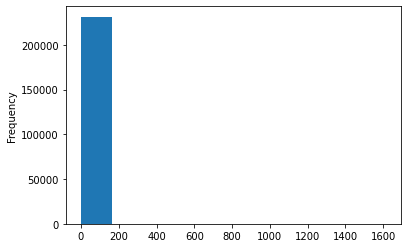

In [61]:
raw_interactions.groupby('recipe_id')['user_id'].count().plot(kind='hist');

Not 100% confident this is the best way to code/calculate this distribution.

---

EDA on `PP_recipes.csv`
---

Data documentation

| Column             | Description                                    |
| ------------------ | ---------------------------------------------- |
| id                | Recipe ID                                       |
| i                 | Recipe ID mapped to contiguous integers from 0  |
| name_tokens       | BPE-tokenized recipe name                       |
| ingredient_tokens | BPE-tokenized ingredients list (list of lists)  |
| steps_tokens      | BPE-tokenized steps                             |
| techniques        | List of techniques used in recipe               |
| calorie_level     | Calorie level in ascending order                |
| ingredient_ids    | IDs of ingredients in recipe                    |

In [56]:
pp_recipes = pd.read_csv('../data/PP_recipes.csv')
pp_recipes.shape

(178265, 8)

In [57]:
pp_recipes.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


##### NOTE: Not useful. Won't be using this dataset!

---

EDA on `PP_users.csv`
---

Data documentation

| Column     | Description                                          |
| ---------- | ---------------------------------------------------- |
| u          | User ID mapped to contiguous integer sequence from 0 |
| techniques | Cooking techniques encountered by user               |
| items      | Recipes interacted with, in order                    |
| n_items    | Number of recipes reviewed                           |
| ratings    | Ratings given to each recipe encountered by this user|
| n_ratings  | Number of ratings in total                           |

In [29]:
pp_users = pd.read_csv('../data/PP_users.csv')
pp_users.shape

(25076, 6)

In [30]:
pp_users.head()

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


#### Distribution of number of reviews written per user

On average, a user reviews approx. 28 recipes on food.com, see summary statistics & histogram below.

In [54]:
pp_users['n_items'].describe()

count    25076.000000
mean        27.871311
std        122.729039
min          2.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       6437.000000
Name: n_items, dtype: float64

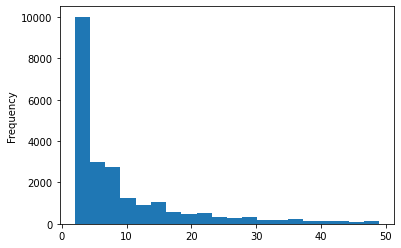

In [58]:
pp_users[pp_users['n_items'] < 50]['n_items'].plot(kind='hist', bins=20);

---